# CPA - Leakage detection

In [42]:
import random
import numpy as np
import datasets
import lascar
lascar.logger.setLevel(lascar.logging.CRITICAL)

Session |  0%||0 trc/100000 | (3 engines, batch_size=100000, leakage_shape=(500,)) |ETA:  --:--:--


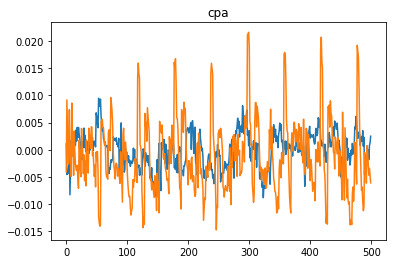

Session |100%||100000 trc/100000 | (3 engines, batch_size=100000, leakage_shape=(500,)) |ETA:  00:00:00
Session |100%||100000 trc/100000 | (3 engines, batch_size=100000, leakage_shape=(500,)) |Time:  0:00:02


In [51]:
data = datasets.dataset('cw_loop5_fixedinput')

trace = lascar.TraceBatchContainer(data["trace"], data)
engine = lascar.CpaEngine(
    name='cpa',
    selection_function=lambda value, guess: random.randint(0, 255) if guess == 0 else value["key"][0],
    guess_range=range(2),
)

session = lascar.Session(trace, engine=engine, output_method=lascar.MatPlotLibOutputMethod(engine))
session.run(batch_size=100_000, thread_on_update=False)